In [1]:
import xml.etree.ElementTree as ET
import glob
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from glob_rotate_with_xml import rotate_xml,computeRotateBox

In [3]:
img_paths = glob.glob('D:\\image\\ekycerror\\front_crop\\*.png')+glob.glob('D:\\image\\ekycerror\\front_crop\\*.jpg')

In [4]:
xml_paths = glob.glob('front_valid_16_6/Annotations/*.xml')

In [5]:
def get_img_path_relative():
    img_paths_relative = []
    for img_path in glob.glob('front_valid_16_6/images/*.png')+glob.glob('front_valid_16_6/images/*.jpg'):
        path = os.path.split(img_path)[-1]
        img_paths_relative.append(path)

In [6]:
def lsvoc_to_voc(xml_paths):    
    for xml_file in xml_paths:
        removal = ['tmp_left','card_old','card_new']
        extensions = ['.png','.PNG','.jpg','.JPG']
        tree  = ET.parse(xml_file)
        root = tree.getroot()
        filename = tree.find('filename')
        name = tree.find('filename').text
        for extension in extensions:

            if os.path.split(name)[-1] + extension in img_paths_relative:
                # print(os.path.split(name)[-1] + extension in img_paths_relative)
                filename.text = filename.text.replace(filename.text,os.path.split(name)[-1] + extension)
                tree.write(xml_file)
        path = ET.Element('path')
        path.text = filename.text
        root.insert(2,path)
        tree.write(xml_file) 
        objects = tree.findall('object')
        for object in objects:
            name = object.find('name').text
            if name in removal:
                root.remove(object)
        tree.write(xml_file)


In [39]:
def rotate_img(image_path, angle=0):
    if angle > 180 or angle < -180:
        angle = np.sign(-angle)*(360-abs(angle))
    # print(dst_img_path)
    # load the image and show it
    # cv2.imshow("Original", image)
    # grab the dimensions of the image and calculate the center of the
    # image
    img_name = os.path.split(image_path)[-1]
    image = cv2.imread(image_path)
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # rotate our image by 45 degrees around the center of the image
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    rotated = cv2.warpAffine(image, M, (nW, nH))
    plt.imshow(cv2.cvtColor(rotated,cv2.COLOR_BGR2RGB))
    # cv2.imshow("Rotated", rotated)
    # cv2.waitKey(0)
    
    cv2.imwrite(f"augument_img/{str(angle)}_rotated_{img_name}", rotated)
    rotated_name = os.path.split(f"augument_img/{str(angle)}_rotated_{img_name}")[-1]
    return rotated_name,M

In [8]:
def get_coor_rotate(v,M_rot):
  '''
  Get new coordinate after rotated
  '''
  calculated = np.dot(M_rot,v)
  (new_x,new_y) = (calculated[0],calculated[1]
  return (int(new_x),int(new_y))

In [27]:
# def rotate_xml(xml_path, M_rot, angle):

#     tree = ET.parse(xml_path)
#     xmlroot = tree.getroot()
#     img_name,extension = xmlroot.find('filename').text.split('.')[0],xmlroot.find('filename').text.split('.')[-1]
#     # filename = xmlroot.find('filename')
#     # filename.text = img_name

#     # filepath = xmlroot.find('path')
#     # if filepath:
#     #     filepath.text = img_name

#     for object in xmlroot.findall('object'):
#         name = object.find('name')
#         bndbox = object.find('bndbox')
#         box = [int(bndbox.find('xmin').text), int(bndbox.find('ymin').text),
#                int(bndbox.find('xmax').text), int(bndbox.find('ymax').text)]
#         new_xmin, new_ymin = get_coor_rotate([box[0],box[1],1],M_rot)
#         new_xmax, new_ymax = get_coor_rotate([box[2],box[3],1],M_rot)
        
#         if new_xmin > new_xmax :
#             new_xmin,new_xmax = new_xmax,new_xmin
#         if new_ymin > new_ymax:
#             new_ymin,new_ymax  = new_ymax,new_ymin
#         delta_x = new_xmax - new_xmin
#         delta_y = new_ymax - new_ymin
#         if (name.text in ['center_new','center_old','tmp_right','tmp_left_hc','tmp_right_hc']) and (angle in [-5,5,-175,175,85,-85,95,-95]):
#             # if angle in [-85,-175,5,95]:
#                 if delta_x > delta_y:
#                     new_ymin = new_ymin - int((1/7)*delta_y)
#                     new_ymax = new_ymax + int((1/7)*delta_y)
#                 if delta_x < delta_y:
#                     new_xmin = new_xmin - int((1/7)*delta_x)
#                     new_xmax = new_xmax + int((1/7)*delta_x)
#         if (name.text in ['center_new','center_old','tmp_right','tmp_left_hc','tmp_right_hc']) and (angle in [45,-45,135,-135]):
#             if delta_x > delta_y:
#                 new_ymin = new_ymin - int((1/3)*delta_x)
#                 new_ymax = new_ymax + int((1/3)*delta_x)
#             if delta_x < delta_y:
#                 new_xmin = new_xmin - int((1/3)*delta_y)
#                 new_xmax = new_xmax + int((1/3)*delta_y)
#         if (name.text in ['center_new','center_old','tmp_right','tmp_left_hc','tmp_right_hc']) and (angle in [15]):
#             if delta_x > delta_y:
#                 new_ymin = new_ymin - int((1/7)*delta_x)
#                 new_ymax = new_ymax + int((1/7)*delta_x)
#             if delta_x < delta_y:
#                 new_xmin = new_xmin - int((1/7)*delta_y)
#                 new_xmax = new_xmax + int((1/7)*delta_y)
#             if name.text == 'center_old':
#                 new_xmin = new_xmin + int((1/7)*(new_ymax-new_ymin))
#                 new_xmax = new_xmax - int((1/7)*(new_ymax-new_ymin))
#         if (name.text in ['center_new','center_old','tmp_right','tmp_left_hc','tmp_right_hc']) and (angle in [-15]):
#             if delta_x > delta_y:
#                 new_ymin = new_ymin - int((1/7)*delta_x)
#                 new_ymax = new_ymax + int((1/7)*delta_x)
#             if delta_x < delta_y:
#                 new_xmin = new_xmin - int((1/7)*delta_y)
#                 new_xmax = new_xmax + int((1/7)*delta_y)

#         if name.text in ['chip','hc'] and (angle in [5,-5,85,-85,95,-95,-175,175]):
#             new_ymin = new_ymin - int((1/9)*delta_y)
#             new_ymax = new_ymax + int((1/9)*delta_y)
#             new_xmin = new_xmin - int((1/9)*delta_x)
#             new_xmax = new_xmax + int((1/9)*delta_x)
#         if name.text in ['chip','hc'] and (angle in [45,-135]):
#             new_ymin = new_ymin - int((1/2)*delta_x)
#             new_ymax = new_ymax + int((1/2)*delta_x)
#         if name.text in ['chip','hc'] and (angle in [-45,135]):
#             new_xmin = new_xmin - int((1/2)*delta_y)
#             new_xmax = new_xmax + int((1/2)*delta_y)
#         if name.text in ['chip','hc'] and (angle in [15]):
#             new_ymin = new_ymin - int((1/5)*delta_x)
#             new_ymax = new_ymax + int((1/5)*delta_x)
#         if name.text in ['chip','hc'] and (angle in [-15]):
#             new_xmin = new_xmin - int((1/5)*delta_y)
#             new_xmax = new_xmax + int((1/5)*delta_y)    
#         if (name.text in ['tmp_mid_left','tmp_bottom_left','tmp_mid_left_hc','tmp_bottom_left_hc']) and (angle in [45,-135]):
#             new_ymin = new_ymin - int((1/3)*delta_x)
#             new_ymax = new_ymax + int((1/3)*delta_x)
#         if (name.text in ['tmp_mid_left','tmp_bottom_left','tmp_mid_left_hc','tmp_bottom_left_hc']) and (angle in [-45,135]):
#             new_xmin = new_xmin - int((1/3)*delta_y)
#             new_xmax = new_xmax + int((1/3)*delta_y)
#         if (name.text in ['tmp_mid_left','tmp_bottom_left','tmp_mid_left_hc','tmp_bottom_left_hc']) and (angle in [15,-15]):
#             new_ymin = new_ymin - int((1/5)*delta_x)
#             new_ymax = new_ymax + int((1/5)*delta_x)
#         xmin = bndbox.find('xmin')
#         xmin.text = str(new_xmin)
#         ymin = bndbox.find('ymin')
#         ymin.text = str(new_ymin)
#         xmax = bndbox.find('xmax')
#         xmax.text = str(new_xmax)
#         ymax = bndbox.find('ymax')
#         ymax.text = str(new_ymax)
#     dst_xml_path = f"augument_xml/{str(angle)}_rotated_{img_name}.xml"
#     tree.write(dst_xml_path)
#     rotate_tree = ET.parse(dst_xml_path)
#     rotated_root = rotate_tree.getroot()
#     filename = rotated_root.find('filename')
#     filename.text = f"{str(angle)}_rotated_{img_name}.{extension}"
#     path = rotated_root.find('path')
#     path.text = f"{str(angle)}_rotated_{img_name}.{extension}"
#     rotate_tree.write(dst_xml_path)

    


In [45]:
def rotate_xml_new(xml_path, M_rot, angle):
    tree = ET.parse(xml_path)
    xmlroot = tree.getroot()
    img_name,extension = xmlroot.find('filename').text.split('.')[0],xmlroot.find('filename').text.split('.')[-1]
    # filename = xmlroot.find('filename')
    # filename.text = img_name

    # filepath = xmlroot.find('path')
    # if filepath:
    #     filepath.text = img_name
    for object in xmlroot.findall('object'):
        name = object.find('name')
        bndbox = object.find('bndbox')
        box = [int(bndbox.find('xmin').text), int(bndbox.find('ymin').text),
               int(bndbox.find('xmax').text), int(bndbox.find('ymax').text)]
        rot_xmin, rot_ymin = get_coor_rotate([box[0],box[1],1],M_rot)
        rot_xmax, rot_ymax = get_coor_rotate([box[2],box[3],1],M_rot)
        delta_x = abs(int(box[2]-box[0]))
        delta_y = abs(int(box[3]-box[1]))
        # if rot_xmin > rot_xmax :
        #     rot_xmin,rot_xmax = rot_xmax,rot_xmin
        # if rot_ymin > rot_ymax:
        #     rot_ymin,rot_ymax  = rot_ymax,rot_ymin
        if angle > 180 or angle < -180:
            angle = np.sign(-angle)*(360-abs(angle))
        if angle < 0 and angle >= -90:
            new_xmin = rot_xmin - delta_y*np.sin(abs(angle)/180*np.pi)
            new_ymin = rot_ymin
            new_xmax = rot_xmax + delta_y*np.sin(abs(angle)/180*np.pi)
            new_ymax = rot_ymax
        if angle >= 0 and angle <= 90:
            new_xmin = rot_xmin
            new_ymin = rot_ymin - delta_x*np.sin(abs(angle)/180*np.pi)
            new_xmax = rot_xmax
            new_ymax = rot_ymax + delta_x*np.sin(abs(angle)/180*np.pi)
        if angle < -90 and angle >= -180:
            new_xmin = rot_xmax
            new_ymin = rot_ymax - delta_x*np.sin((180-abs(angle))/180*np.pi) 
            new_xmax = rot_xmin
            new_ymax = rot_ymin + delta_x*np.sin((180-abs(angle))/180*np.pi)
        if angle > 90 and angle <= 180:
            new_xmin = rot_xmax - delta_y*np.sin((180-abs(angle))/180*np.pi)
            new_ymin = rot_ymax
            new_xmax = rot_xmin + delta_y*np.sin((180-abs(angle))/180*np.pi)
            new_ymax = rot_ymin
        xmin = bndbox.find('xmin')
        xmin.text = str(new_xmin)
        ymin = bndbox.find('ymin')
        ymin.text = str(new_ymin)
        xmax = bndbox.find('xmax')
        xmax.text = str(new_xmax)
        ymax = bndbox.find('ymax')
        ymax.text = str(new_ymax)
    dst_xml_path = f"augument_xml/{str(angle)}_rotated_{img_name}.xml"
    tree.write(dst_xml_path)
    rotate_tree = ET.parse(dst_xml_path)
    rotated_root = rotate_tree.getroot()
    filename = rotated_root.find('filename')
    filename.text = f"{str(angle)}_rotated_{img_name}.{extension}"
    path = rotated_root.find('path')
    path.text = f"{str(angle)}_rotated_{img_name}.{extension}"
    rotate_tree.write(dst_xml_path)
    

In [21]:
name1 = 'img_146'
name2 = 'cccd_tunn_part2_img_613'
name3 = '95529371f87b63ec0adbfb05b6092984'
name4 = 'e1a4db3003c2d77913cce18e4e43231f'
name5 = '450_HC_0003'
name6 = '450_HC_0006'
name7 = '450_IMG_0337'

In [28]:
# i = 0
# for img_path in hc[200:]:                 
#     i = i + 1
#     short_name, extension = os.path.split(img_path)[-1].split('.')[0],os.path.split(img_path)[-1].split('.')[-1]
#     for angle in [-135, -90, -45, -15, -5, 5, 15, 45, 90, 135, 180]:
#         rotated_name,M=rotate_img(f"images/front_crop/{short_name}.{extension}",angle)
#         rotate_xml_new(f"Annotations/front_crop/{short_name}.xml",M,angle)
#     print(f"{i}/50")

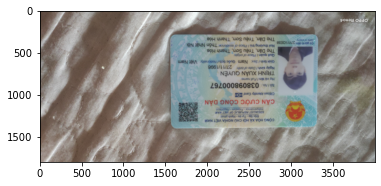

In [48]:
for angle in [-135, -90, -45, -15, -5, 5, 15, 45, 90 ,135, 180]:
        rotated_name,M=rotate_img(f"images/front_crop/{name3}.png",angle)
        rotate_xml_new(f"Annotations/front_crop/{name3}.xml",M,angle)

In [ ]:
for xml_path in glob.glob('Annotations/front_crop/*.xml')[0:100]:
    tree  = ET.parse(xml_path)
    root = tree.getroot()
    filename = tree.find('filename')
    filename = tree.find('filename').text
    short_name,extension = filename.split('.')[0],filename.split('.')[-1]
    angles = [0,5,-5,90,-90,180,175,-175]
    for angle in angles:
        rotated_name,M=rotate_img(f"images/front_crop/{short_name}.{extension}",angle)
        rotate_xml(f"Annotations/front_crop/{short_name}.xml",M,angle)
            
    